## Self Learning of ML pipelines
#### Will use the column transformer so some columns can go through the standardard scaler and some can go through label encoding or OneHotEncoding. Done with wine dataset

In [1]:
# import required dependencies

import pandas as pd
import numpy as np
import matplotlib 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier#
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer  # this is so some columns can go though one hot encoding (for example) and other columns in the ML pipeline can go through the standard scaler

### For the first test we will use a wine database for white wines (I have a red as well, but there are fewer columns)

In [56]:
df_white_wine = pd.read_csv("Resources/winequality-white_parsed2.csv")
df_white_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### while none of the columns need label encoding, nor OneHotEncoding, I'll still set up the ML Pipeline to be flexible

In [57]:
df_X = df_white_wine.copy()
df_X.drop(columns='quality', inplace=True)
display(f"df_X head...")
display(df_X.head(10))
df_y = df_white_wine[['quality']]
print("df_y head...")
display(df_y.head(10))

'df_X head...'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


df_y head...


,quality
0,6
1,6
2,6
3,6
4,6
5,6
6,6
7,6
8,6
9,6


In [58]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=42)
display('X_train head...')
display(X_train.head(7))
display('y_train head...')
display(y_train.head(7))

'X_train head...'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2835,6.3,0.25,0.22,3.30,0.048,41.0,161.0,0.99256,3.16,0.50,10.5
1157,7.8,0.30,0.29,16.85,0.054,23.0,135.0,0.99980,3.16,0.38,9.0
744,7.4,0.38,0.27,7.50,0.041,24.0,160.0,0.99535,3.17,0.43,10.0
1448,7.4,0.16,0.49,1.20,0.055,18.0,150.0,0.99170,3.23,0.47,11.2
3338,7.2,0.27,0.28,15.20,0.046,6.0,41.0,0.99665,3.17,0.39,10.9
1965,6.8,0.27,0.28,13.30,0.076,50.0,163.0,0.99790,3.03,0.38,8.6
3026,8.4,0.22,0.30,8.90,0.024,17.0,118.0,0.99456,2.99,0.34,10.5


'y_train head...'

,quality
2835,6
1157,6
744,5
1448,6
3338,6
1965,6
3026,6


In [59]:
# set up columns to scale or OneHotEncode or LabelEncode
one_hot_encoder_columns = []
label_encoder_columns = []
ordinal_columns = []
numeric_columns = df_X.columns

### Set up Column Transformer and pipeline


In [60]:
# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns) #,
        #('nom_cat', OneHotEncoder(), one_hot_encoder_columns),
        #('ord_cat', OrdinalEncoder(), ordinal_columns)
    ])


In [61]:
# Create pipeline
pipeline_linear = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Pipeline with Ridge Regression
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge())])

# Pipeline with RandomForestClassifier
pipeline_RF = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RandomForestClassifier(max_depth= 8, n_estimators=200, random_state=42))])

In [62]:
''' 
# Define parameter grid
param_grid = [
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.1, 1.0, 10, 100]  # Hyperparameters for logistic regression
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [10, 100, 1000],  # Hyperparameters for random forest
        'classifier__max_depth': [None, 5, 10, 20]
    }
]



# Best parameters and score
print("Best parameters:")
print(grid_search.best_params_)
print("Best score:")
print(grid_search.best_score_)
'''

' \n# Define parameter grid\nparam_grid = [\n    {\n        \'classifier\': [LogisticRegression()],\n        \'classifier__C\': [0.1, 1.0, 10, 100]  # Hyperparameters for logistic regression\n    },\n    {\n        \'classifier\': [RandomForestClassifier()],\n        \'classifier__n_estimators\': [10, 100, 1000],  # Hyperparameters for random forest\n        \'classifier__max_depth\': [None, 5, 10, 20]\n    }\n]\n\n\n\n# Best parameters and score\nprint("Best parameters:")\nprint(grid_search.best_params_)\nprint("Best score:")\nprint(grid_search.best_score_)\n'

In [81]:
def accuracyish_score(y_truth_array, y_pred_array, margin):
    accuracy_rating_list = []
    # print(f"in sub function type of y_truth_array is: {type(y_truth_array)}")
    # print(f"in sub function type of y_pred_array is: {type(y_pred_array)}")
    # print(f"in sub function type of y_truth_array[0] is: {type(y_truth_array[0])}")
    # print(f"in sub function type of y_pred_array[0] is: {type(y_pred_array[0])}")
    for i, y_truth in enumerate(y_truth_array):
        if abs(y_pred_array[i] - y_truth) <= margin:
            accuracy_rating_list.append(1)
        else:
            accuracy_rating_list.append(0)
    return sum(accuracy_rating_list) / len(accuracy_rating_list)

y_train_array = y_train.values.flatten()
margin = 1.6  # if within margin in predicted versus scored, then 

pipeline_linear.fit(X_train, y_train)

# Fit and evaluate the Linear Regression pipeline
pred_linear_train = np.rint(pipeline_linear.predict(X_train)).astype(int)
pred_linear_train_float = pipeline_linear.predict(X_train).flatten()

print(f'Linear Regression Mean Squared Error: {mean_squared_error(y_train_array, pred_linear_train):.3f}')
print(f'Linear Regression R squred: {r2_score(y_train, pred_linear_train):.3f}')
print(f'Linear Regression Accuracy Score: {accuracy_score(y_train, pred_linear_train):.3f}')
print(f'Linear Regression Accuracy-ish Score (margin = {margin}): {accuracyish_score(y_train_array, pred_linear_train_float, margin):.3f}')
print("/n/n")

# Fit and evaluate the Ridge Regression pipeline
pipeline_ridge.fit(X_train, y_train)
pred_ridge_train = np.rint(pipeline_ridge.predict(X_train)).astype(int)
pred_ridge_train_float = pipeline_ridge.predict(X_train).flatten()
print(f'Ridge Regression Mean Squared Error: {mean_squared_error(y_train, pred_ridge_train_float):.3f}')
print(f'Ridge Regression R squred: {r2_score(y_train, pred_ridge_train):.3f}')
print(f'Ridge Regression Accuracy Score: {accuracy_score(y_train, pred_ridge_train):.3f}')
print(f'Ridge Regression Accuracy-ish Score (margin = {margin}): {accuracyish_score(y_train_array, pred_ridge_train_float, margin):.3f}')
print("/n/n")

# Fit and evaluate the RandomForestClassifier pipeline
pipeline_RF.fit(X_train, y_train)
pred_RF_train = pipeline_RF.predict(X_train)
print(f'Random Forest Accuracy Score: {accuracy_score(y_train, pred_RF_train):.3f}')

Linear Regression Mean Squared Error: 0.637
Linear Regression R squred: 0.190
Linear Regression Accuracy Score: 0.527
Linear Regression Accuracy-ish Score (margin = 1.6): 0.961
/n/n
Ridge Regression Mean Squared Error: 0.564
Ridge Regression R squred: 0.190
Ridge Regression Accuracy Score: 0.527
Ridge Regression Accuracy-ish Score (margin = 1.6): 0.961
/n/n


c:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy Score: 0.714


### get a histogram

<Axes: ylabel='Frequency'>

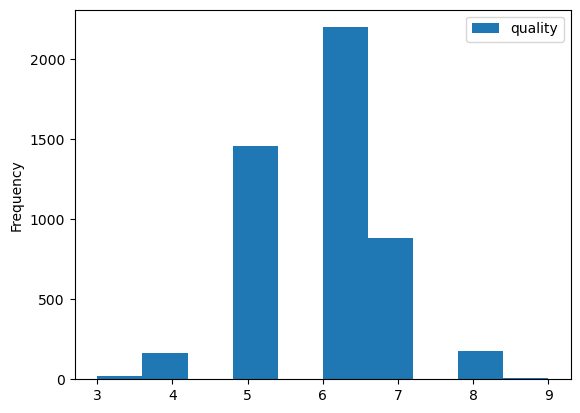

In [83]:
df_white_wine[['quality']].plot.hist()